In [47]:
import streamlit as st
import tensorflow as tf
import os
import pandas as pd
from tensorflow.keras import layers , models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam



In [31]:
train_dir='training_set'
validation_dir='test_set'


In [32]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'

)

In [33]:
validation_datagen=ImageDataGenerator(rescale=1./255)

In [34]:
train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)    

Found 8005 images belonging to 2 classes.


In [35]:
validation_generator=validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

Found 1435 images belonging to 2 classes.


In [36]:
model=models.Sequential()

In [ ]:
# model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
# model.add(layers.MaxPooling2D((2,2)))

# model.add(layers.Conv2D(64,(3,3),activation='relu'))
# model.add(layers.MaxPooling2D((2,2)))

# model.add(layers.Conv2D(128,(3,3),activation='relu'))
# model.add(layers.MaxPooling2D((2,2)))

# model.add(layers.Conv2D(128,(3,3),activation='relu'))
# model.add(layers.MaxPooling2D((2,2)))


In [37]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.BatchNormalization())

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))   # 🔑 prevents overfitting
model.add(layers.Dense(1, activation='sigmoid'))


In [ ]:
# model.add(layers.Flatten())
# model.add(layers.Dense(512,activation='relu'))
# model.add(layers.Dense(1,activation='sigmoid'))


In [38]:

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [42]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()





Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 74, 74, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 36, 36, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 17, 17, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,454,529 (13.18 MB)

 Trainable params: 3,453,825 (13.18 MB)

 Non-trainable params: 704 (2.75 KB)

In [44]:
history=model.fit(
    train_generator,
    steps_per_epoch=50,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5592 - loss: 2.1823

c:\Users\visha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.5591 - loss: 2.1816 - val_accuracy: 0.6962 - val_loss: 1.1711
Epoch 2/20


c:\Users\visha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


50/50 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.5412 - loss: 1.9062 - val_accuracy: 0.5652 - val_loss: 0.7511
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - accuracy: 0.5690 - loss: 1.2861 - val_accuracy: 0.3373 - val_loss: 1.9343
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.5852 - loss: 1.2412 - val_accuracy: 0.3937 - val_loss: 1.1311
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.6063 - loss: 0.9662 - val_accuracy: 0.5707 - val_loss: 0.7238
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 47s 945ms/step - accuracy: 0.5625 - loss: 1.0022 - val_accuracy: 0.6244 - val_loss: 0.6847
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 121s 2s/step - accuracy: 0.6258 - loss: 0.7938 - val_accuracy: 0.4000 - val_loss: 0.9425
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.6356 - loss: 0.7065 - val_accuracy: 0.3192 - val_loss: 1.1363
Epoch 9/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - accuracy: 0.6353 - loss: 0.6946 - val_accuracy: 0.4237 - val_loss: 

# save model

In [49]:
model.save(r"G:\My Drive\UDEMY\day 13\my_model.h5")
st.success("Model trained and saved successfully!")


2025-08-29 20:37:44.870 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-29 20:37:44.872 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

# Load the trained model. This will only run once due to st.cache_resource.

In [51]:

if os.path.exists(r"G:\My Drive\UDEMY\day 13\my_model.h5"):
    st.info("Loading pre-trained model...")
    model = tf.keras.models.load_model(r"G:\My Drive\UDEMY\day 13\my_model.h5")
    st.success("Model loaded!")
else:
    model = train_and_save_model()

2025-08-29 20:37:58.761 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-29 20:37:58.764 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-29 20:37:59.131 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-29 20:37:59.131 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


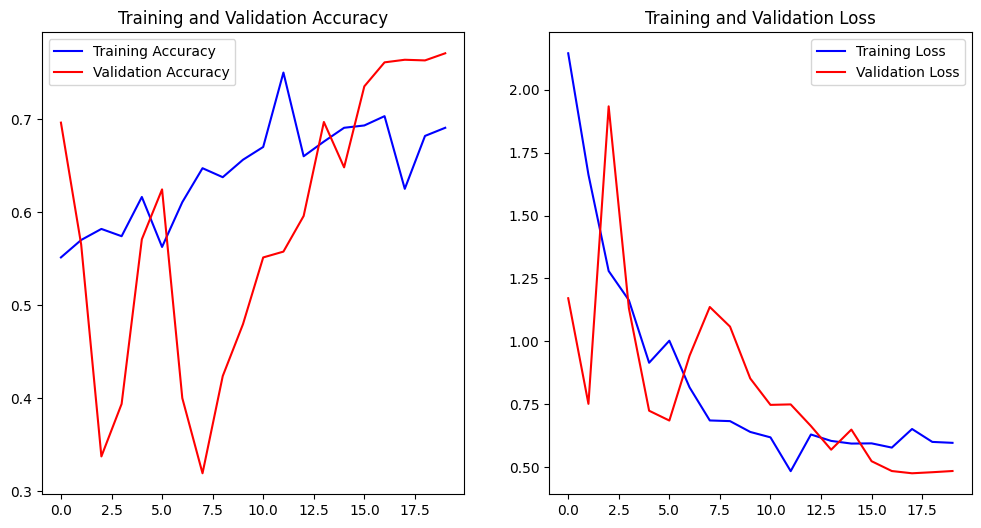

In [52]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.plot(epochs,val_acc,'r',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs,loss,'b',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()



In [53]:
import numpy as np
from tensorflow.keras.preprocessing import image

# --- 2. Prediction Function ---

In [ ]:
# def predict_image(model, img_path):
#     img = image.load_img(img_path, target_size=(150,150))
#     img_array = image.img_to_array(img)
#     img_array = np.expand_dims(img_array, axis=0)
#     img_array /= 255.0

#     prediction = model.predict(img_array)
#     if prediction[0] > 0.5:
#         print("It's a dog")
#     else:
#         print("It's a cat")


In [54]:
def predict_image(model, uploaded_file):
    """
    Predicts if the uploaded image contains a cat or a dog.
    """
    # Load and preprocess the image
    img = image.load_img(uploaded_file, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Make the prediction
    prediction = model.predict(img_array)
    confidence = prediction[0][0]

    # Return the result
    return 'dog' if confidence > 0.5 else 'cat', confidence


In [ ]:
# predict_image(model,'test-image.jpg')

In [55]:
st.title("Cat vs Dog Image Classifier")
st.markdown("Upload an image below and let the model predict if it's a cat or a dog!")

# File uploader widget
uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "png", "jpeg"])

if uploaded_file is not None:
    # Display the uploaded image
    st.image(uploaded_file, caption='Uploaded Image', use_column_width=True)
    st.write("")

    # Prediction button
    if st.button('Predict'):
        with st.spinner('Making a prediction...'):
            label, confidence = predict_image(model, uploaded_file)
            st.markdown(f"**Prediction:** This is a **{label.upper()}**")
            st.markdown(f"**Confidence:** `{confidence:.2f}`")

    
st.markdown("---")
st.markdown("### How it Works")
st.markdown(
    """
    1.  **Model Training:** A Convolutional Neural Network (CNN) is trained on a dataset of cat and dog images.
    2.  **Model Saving:** The trained model is saved to a file (`cat_vs_dog_model.h5`) to prevent re-training on subsequent runs.
    3.  **Image Upload:** The user uploads a new image.
    4.  **Prediction:** The image is preprocessed and fed into the trained model, which outputs a probability score. A score over 0.5 is classified as 'dog', otherwise 'cat'.
    """
)


2025-08-29 20:38:13.663 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-29 20:38:13.664 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-29 20:38:13.665 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-29 20:38:13.667 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-29 20:38:13.669 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-29 20:38:13.669 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-29 20:38:13.670 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-29 20:38:13.672 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()